## Ex. 1-4)  Histogram equalization
Let's apply histogram equalizatio to images. First you need to obtain the cumulative distrubtion function, and then convert the cdf value to pixel intensity.

### Type your code here.

(683, 1024, 3)


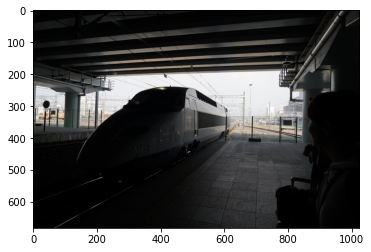

In [9]:
import os

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from utils import rgb_to_hsv, hsv_to_rgb

img_path = "./in/dark.jpg"

img = Image.open(img_path)

imgplot = plt.imshow(img)
rgb_img = np.asarray(img)
print(rgb_img.shape)

<h3> Preparation (flattening) </h3>

For histogram equalization, we cannot equalize along all the color channels at the same time. Not just that, we cannot equalize with RGB. <br>
<img src="./fig/ss_hist_eq.png" width=500 height=300 />
<br>
Source: <a href="https://towardsdatascience.com/histogram-equalization-5d1013626e64">This</a> article by Shreenidhi Sudhakar.

Hence, we flatten the whole image, then along each color channel, then with hsv.

In [79]:
flat_rgb = rgb_img.flatten()
flat_r = rgb_img[:,:,0].flatten()
flat_g = rgb_img[:,:,1].flatten()
flat_b = rgb_img[:,:,2].flatten()
hsv_img = rgb_to_hsv(rgb_img)
flat_v = hsv_img[:,:,2].flatten()
print(flat_rgb.shape)
print(flat_r.shape)
print(flat_g.shape)
print(flat_b.shape)
print(flat_v.shape)
print(np.max(flat_v), np.min(flat_v))

(2098176,)
(699392,)
(699392,)
(699392,)
(699392,)
100.0 0.0


In [80]:
# This function does not need changes.
def get_histogram(image, bins):
    histogram = np.zeros(bins)
    for pixel in image:
        histogram[pixel] += 1
    return histogram

hist_rgb = get_histogram(flat_rgb, 256) # To compare later
hist_r = get_histogram(flat_r, 256) # Range is 0-255
hist_g = get_histogram(flat_g, 256) # Range is 0-255
hist_b = get_histogram(flat_b, 256) # Range is 0-255
hist_v = get_histogram(np.rint(flat_v).astype('uint8'), 101) # Range is 0-500

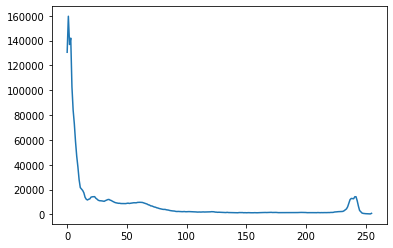

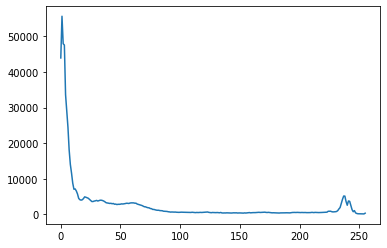

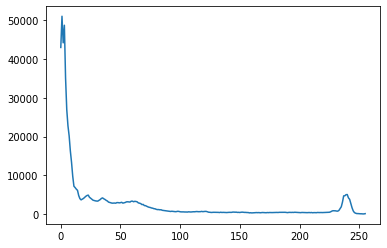

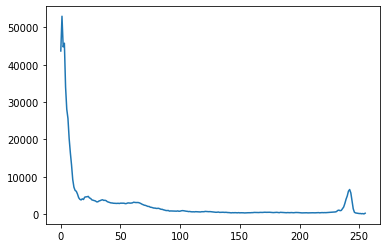

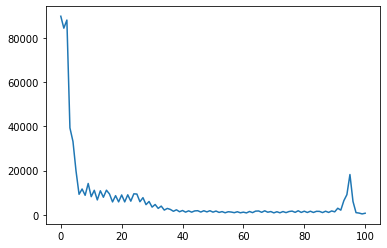

In [81]:
plt.plot(hist_rgb)
plt.show()
plt.plot(hist_r)
plt.show()
plt.plot(hist_g)
plt.show()
plt.plot(hist_b)
plt.show()
plt.plot(hist_v)
plt.show()

As shown above, all color channels have similar distribution. <br>
<strong> That is the ONLY reason why the code provided in the class works fairly well. </strong> <br>
In short, we HAVE to use hsv scale and equalize along values.

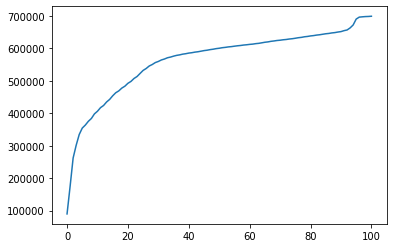

In [83]:
def cumsum(hist):
    cumsum_arr = [hist[0]]
    for v in hist[1:]:
        cumsum_arr.append(cumsum_arr[-1]+v)
    return np.array(cumsum_arr)

cum_sum = cumsum(hist_v)
plt.plot(cum_sum)
plt.show()

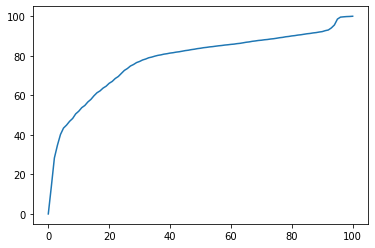

In [86]:
cum_snorm = (cum_sum - cum_sum.min())
N = cum_sum.max() - cum_sum.min()

cum_snorm = cum_snorm / N *100

plt.plot(cum_snorm)

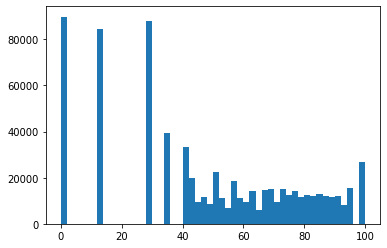

(683, 1024, 2)
(683, 1024, 1)
(683, 1024, 3)
[255 255 255]


In [88]:
hsv_img_v = cum_snorm[np.rint(flat_v).astype('uint8')]
plt.hist(hsv_img_v, bins = 50)
plt.show()

hsv_img_v = np.reshape(hsv_img_v, hsv_img.shape[0:2])
hsv_img_v = np.expand_dims(hsv_img_v, axis=2)
print(hsv_img[:,:,0:2].shape)
print(hsv_img_v.shape)
hsv_new = np.concatenate((hsv_img[:,:,0:2], hsv_img_v), axis = 2)
print(hsv_new.shape)
rgb_new = hsv_to_rgb(hsv_new).astype('uint')
print(np.amax(np.amax(rgb_new, 0), 0))

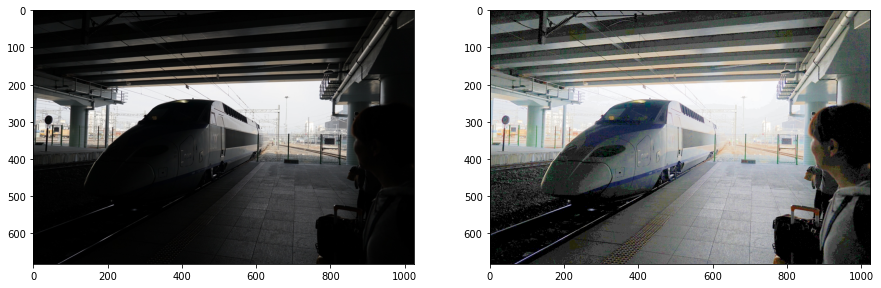

In [89]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(rgb_img)

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(rgb_new)

plt.show(block=True)

Example code:

copyright: https://medium.com/hackernoon/histogram-equalization-in-python-from-scratch-ebb9c8aa3f23

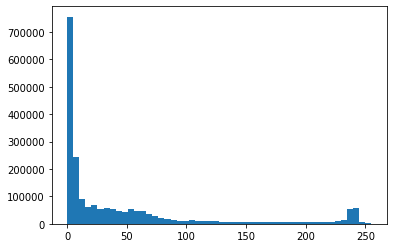

In [29]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

in_img_path = "in/dark.jpg"
img = Image.open(in_img_path)

# convert our image into a numpy array
img = np.asarray(img)

# put pixels in a 1D array by flattening out img array
flat = img.flatten()

# show the histogram
plt.hist(flat, bins=50)
plt.show()

In [30]:
# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

# execute our histogram function
hist = get_histogram(flat, 256)

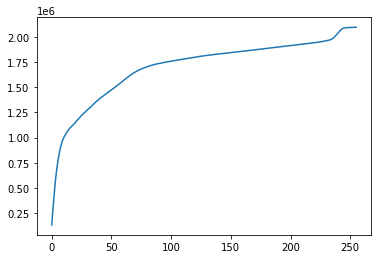

In [31]:
# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs)

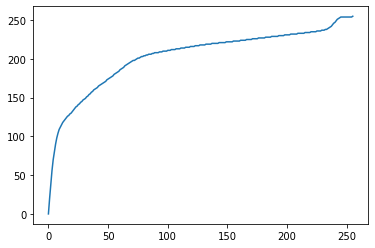

In [32]:
# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cumsum
cs = nj / N

# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

plt.plot(cs)

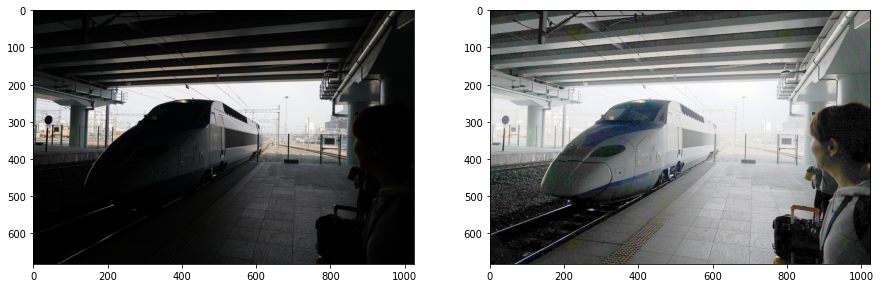

(683, 1024, 3)
(683, 1024, 3)


In [33]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]

# put array back into original shape since we flattened it
img_new = np.reshape(img_new, img.shape)

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)
print(img.shape)
print(img_new.shape)